In [1]:
# launch from virtual env DicomProcessing
# import packages

import pydicom as dicom
import os
import numpy
from matplotlib import pyplot, cm

In [2]:
def acquire_sorted_sequence(PathDicom,idx,max_digits):
    
    # input:
    #     For filename:"ADNI_002_S_4270_MR_MPRAGE_br_raw_20121115114406229_10_S174698_I346803"
    #     under PathDicom: "C:/files/data"
    #
    #     "10" is the index of this slice, which has index 9 in list(filename.split('_'))
    #     idx_location = 9
    #
    #     if there are 99 slices: max_digits = 2
    #     if there are 999 slices: max_digits = 3
    #
    # output:
    #     scanning images in right order
    
    unsortedFilesDCM = {}  # create an empty dictionary

    for dirName, subdirList, fileList in os.walk(PathDicom):
        for filename in fileList:
            if ".dcm" in filename.lower():  # check whether the file's DICOM
                new_idx = normalize_index(filename,idx,max_digits)  # zero-padding
                unsortedFilesDCM[new_idx] = os.path.join(dirName,filename)

    sorting = sorted(unsortedFilesDCM.keys()) # images in the right order
    lstFilesDCM = []
    for i in sorting:
        lstFilesDCM.append(unsortedFilesDCM[i])

    for i in lstFilesDCM:
        print(i,'\t')
        
    return lstFilesDCM



def normalize_index(fname,idx_location,max_digits):
    # name files in a unified way by zero-padding:0001,0002,...
    
    lst = list(fname.split('_'))
    slice_idx = lst[idx_location]
    digits = len(slice_idx)
    
    if digits < max_digits:
        new_idx = '0' * (max_digits - digits) + slice_idx
        return new_idx
    else:
        return slice_idx


In [8]:
# reference:
# https://pyscience.wordpress.com/2014/09/08/dicom-in-python-importing-medical-image-data-into-numpy-with-pydicom-and-vtk/

home = r"D:\CY\Beihang_courses\cy_junior_2\Nervous_system_medical_engineering\project\ADNIdata\Test"
#PathDicom = home + "\sMRI-dicom\\002_S_4270_MPRAGE"
PathDicom = home + "\\T1Raw\\Sub_001"
print(PathDicom)


lstFilesDCM = []
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))
 
#lstFilesDCM = acquire_sorted_sequence(PathDicom,11,4)
lstFilesDCM

D:\CY\Beihang_courses\cy_junior_2\Nervous_system_medical_engineering\project\ADNIdata\Test\T1Raw\Sub_001


ourses\\cy_junior_2\\Nervous_system_medical_engineering\\project\\ADNIdata\\Test\\T1Raw\\Sub_001\\000017.dcm',
 'D:\\CY\\Beihang_courses\\cy_junior_2\\Nervous_system_medical_engineering\\project\\ADNIdata\\Test\\T1Raw\\Sub_001\\000018.dcm',
 'D:\\CY\\Beihang_courses\\cy_junior_2\\Nervous_system_medical_engineering\\project\\ADNIdata\\Test\\T1Raw\\Sub_001\\000019.dcm',
 'D:\\CY\\Beihang_courses\\cy_junior_2\\Nervous_system_medical_engineering\\project\\ADNIdata\\Test\\T1Raw\\Sub_001\\000020.dcm',
 'D:\\CY\\Beihang_courses\\cy_junior_2\\Nervous_system_medical_engineering\\project\\ADNIdata\\Test\\T1Raw\\Sub_001\\000021.dcm',
 'D:\\CY\\Beihang_courses\\cy_junior_2\\Nervous_system_medical_engineering\\project\\ADNIdata\\Test\\T1Raw\\Sub_001\\000022.dcm',
 'D:\\CY\\Beihang_courses\\cy_junior_2\\Nervous_system_medical_engineering\\project\\ADNIdata\\Test\\T1Raw\\Sub_001\\000023.dcm',
 'D:\\CY\\Beihang_courses\\cy_junior_2\\Nervous_system_medical_engineering\\project\\ADNIdata\\Test\\T1Raw\\S

In [9]:
# Get ref file
RefDs = dicom.read_file(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), 
                     float(RefDs.PixelSpacing[1]), 
                     float(RefDs.SliceThickness))

print("{} x {} pixels, {} slices".format(ConstPixelDims[0],ConstPixelDims[1],ConstPixelDims[2]))
print("{}mm x {}mm resolution, slice thickness {}mm".format(ConstPixelSpacing[0],ConstPixelSpacing[1],ConstPixelSpacing[2]))

256 x 256 pixels, 170 slices
1.0mm x 1.0mm resolution, slice thickness 1.2mm


In [16]:
x = numpy.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = numpy.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = numpy.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])


In [17]:
# The array is sized based on 'ConstPixelDims'
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = dicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array  
    

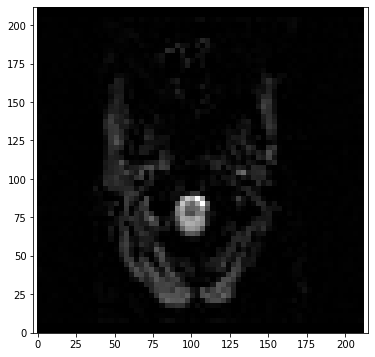

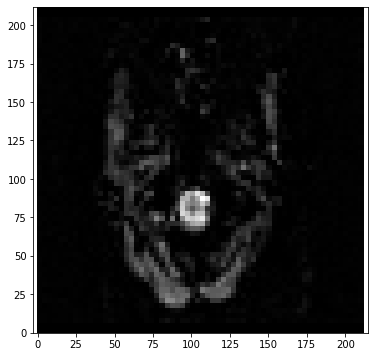

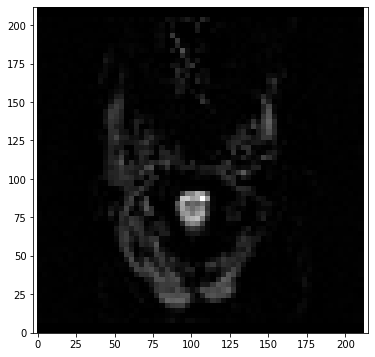

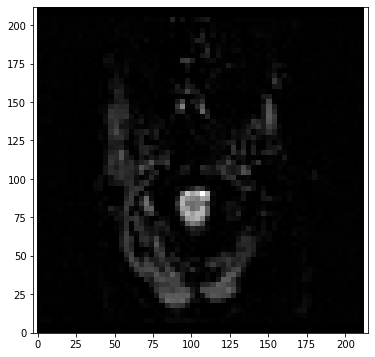

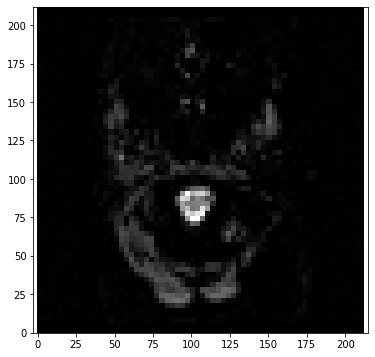

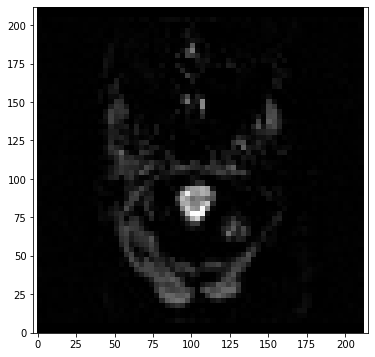

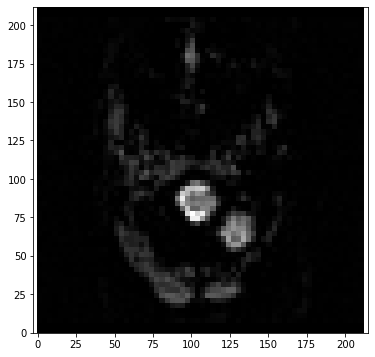

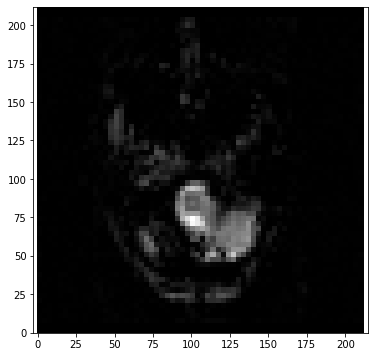

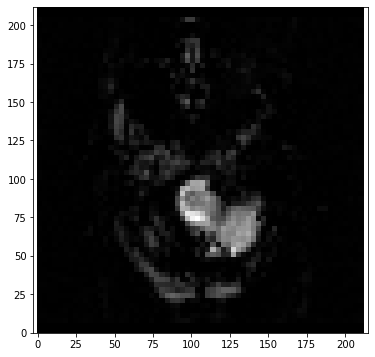

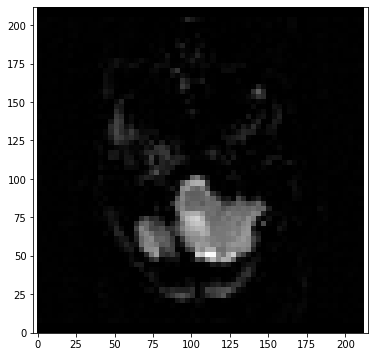

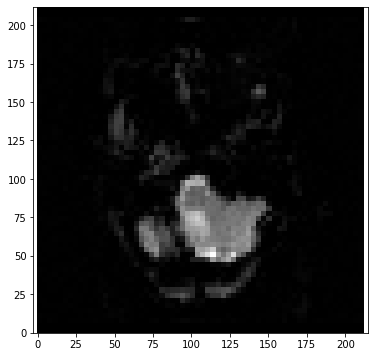

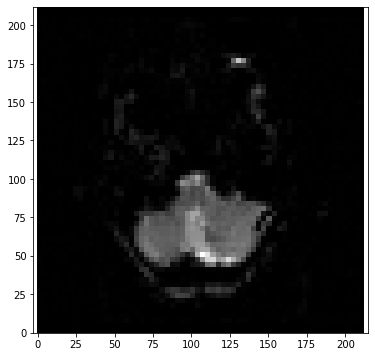

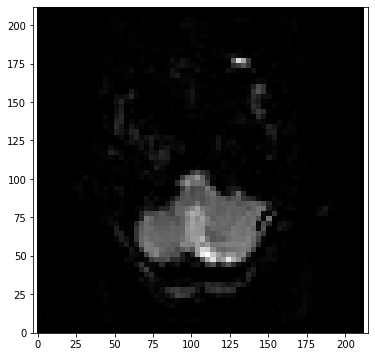

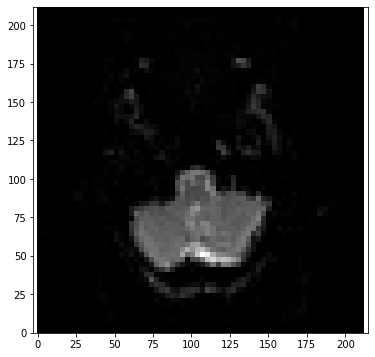

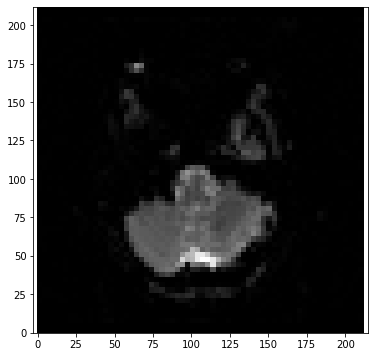

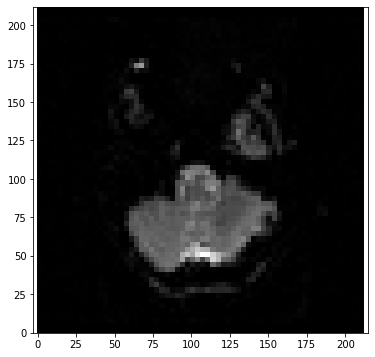

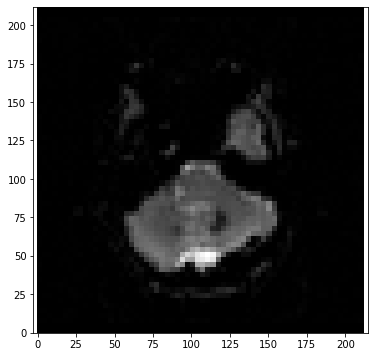

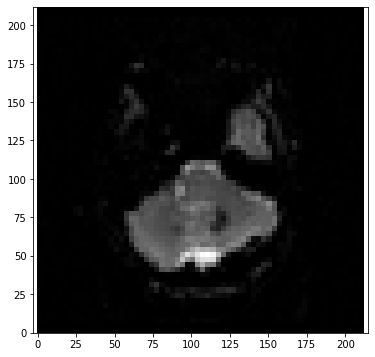

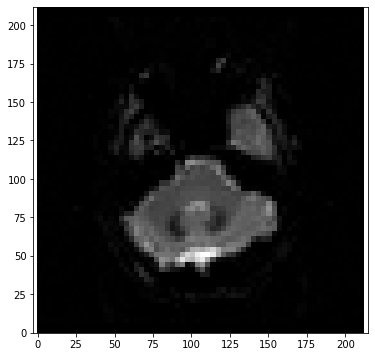

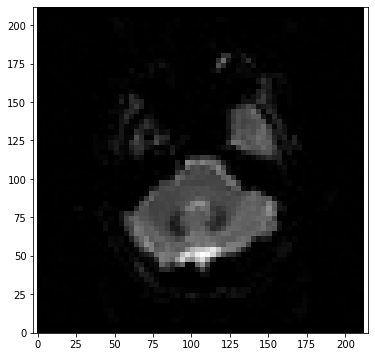

In [19]:
for k in range(20):
    #pyplot.figure(dpi=300)
    pyplot.figure(figsize=(6,6))
    pyplot.axes().set_aspect('equal', 'datalim')
    pyplot.set_cmap(pyplot.gray())
    pyplot.pcolormesh(x, y, numpy.flipud(ArrayDicom[:, :, k*80]))
